In [24]:
# ! pip install tensorflow==2.3.0

     |████████████████████████████████| 165.1 MB 2.1 MB/s eta 0:00:01    |█████████████████▎              | 89.2 MB 1.4 MB/s eta 0:00:56
     |████████████████████████████████| 28.5 MB 1.8 MB/s eta 0:00:01    |████████▋                       | 7.7 MB 1.5 MB/s eta 0:00:15     |█████████▎                      | 8.2 MB 1.5 MB/s eta 0:00:14
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.1
    Uninstalling tensorflow-2.3.1:
      Successfully uninstalled tensorflow-2.3.1


In [1]:
import time
import tensorflow as tf
import os
from create_dataset import load_data
from generator import generator, initialize_generator_weights, generator_loss
from discriminator import initialize_discriminator_weights, discriminator, discriminator_loss
from IPython import display
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.0002
BATCH_SIZE = 32

In [3]:
tf.__version__

'2.3.0'

In [4]:
ROOT_PATH = "./data/"
# ROOT_PATH = "/home/walmasri/cifre/Generative-Adversarial-Network/Topology_Optimization/Counting_bars_in_design/data/total/"
train_data_directory = os.path.join(ROOT_PATH, "train/")
# test_data_directory = os.path.join(ROOT_PATH, "validation/")

images_train = load_data(train_data_directory)
# imges_test = load_data(test_data_directory)
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(5000).batch(BATCH_SIZE)

In [5]:
# plt.imshow(images_train[0, :, :, 0], cmap='gray')

In [6]:
weights_d, biases_d = initialize_discriminator_weights(nf = 32)
weights_g, biases_g = initialize_generator_weights(nf = 32)

In [7]:
generator_optimizer = tf.optimizers.Adam(learning_rate)
discriminator_optimizer = tf.optimizers.Adam(learning_rate)

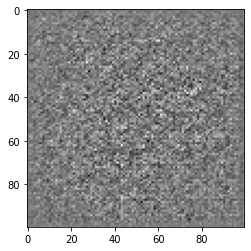

In [8]:
noise = tf.random.normal([2,100])
generated_image = generator(noise, weights_g, biases_g )

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [13]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, weights_g, biases_g)

        real_output = discriminator(images, weights_d, biases_d)
        fake_output = discriminator(generated_images, weights_d, biases_d)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        generator_trainable_variables = list(weights_g.values()) + list(biases_g.values())
        gradients_of_generator = gen_tape.gradient(gen_loss, generator_trainable_variables)
        discriminator_trainable_variables = list(weights_d.values()) + list(biases_d.values())
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_trainable_variables))

In [10]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [14]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 seed)
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
train(train_dataset, epochs=1)